In [1]:
# common packages
import numpy as np
import sys
import os

# main focus
import cv2

# displaying images
from matplotlib.pyplot import imshow
%matplotlib inline

# important dependencies
print("Python: {}".format(sys.version_info[:]))
print("OpenCV: {}".format(cv2.__version__))
print("Numpy: {}".format(np.__version__))

Python: (3, 6, 1, 'final', 0)
OpenCV: 3.1.0
Numpy: 1.13.1


## Basics

### I/O


#### Example Image
![books](sample_images/books.jpg)

### Reading and displaying an image from file

In [2]:
img_path = "./sample_images/books.jpg"
image = cv2.imread(img_path, cv2.IMREAD_ANYCOLOR | cv2.IMREAD_ANYDEPTH)
print(image.shape)
print(image[200][200])

(2268, 4032, 3)
[ 71 142 209]


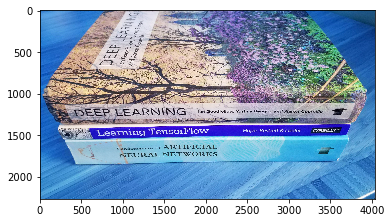

In [3]:
imshow(image)

Something doesn't look right.... So, what if try this?

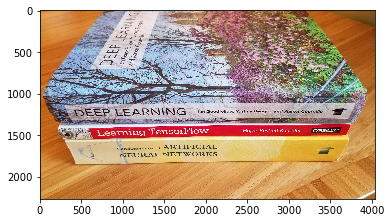

In [4]:
imshow(image[:,:,::-1])

### What happened?
You already know since you read the docs, right?

Half kidding -- but the issue here is that cv2 is reading images in as BGR and our plotting function is displaying in RGB. The solution, as shown above, was to reverse the channel order using a list comprehension [B,G,R] -> [R,G,B].  But this is fairly ugly and may not be intuitive to someone looking through the code.  So is there a way to make this conversion using CV2?

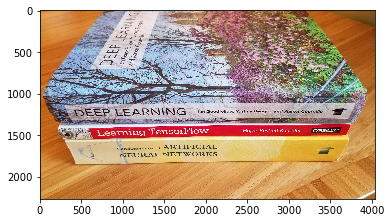

In [5]:
# convert to rgb using cv2
imgRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
imshow(imgRGB)

### Writing an image to file

In [6]:
cv2.imwrite("./sample_images/books.jpg", imgRGB)
print("done")

done


How do we know if the file was written though?

Glad you asked!

In [7]:
written = cv2.imwrite("./sample_images/books_2.jpg", imgRGB)
print(written)

True


What if we write to a bad, nonexistent, location?

In [8]:
written = cv2.imwrite("./xxxx/books_2.jpg", imgRGB)
print(written)

False


Is the file actually present?

In [9]:
print(os.listdir("./sample_images"))

['books_2.jpg', 'books.jpg']
